<a href="https://colab.research.google.com/github/DeepakRapeti/HOUSEING_SALE_PRICE/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTION OF HOUSE SALE **PRICE** 

IMPORTING NECESSARY MODULES

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data=pd.read_csv("/content/Raw_Housing_Prices.csv")
data["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

TREATING OUTLIER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


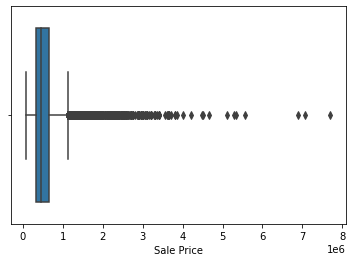

In [50]:
#finding outlier
sns.boxplot(data["Sale Price"])

In [51]:
#finding quartiles and interquartile range
q1=data["Sale Price"].quantile(0.25)
q3=data["Sale Price"].quantile(0.75)
iqr=q3-q1
iqr,q1,q3

(323050.0, 321950.0, 645000.0)

In [52]:
upper_limit=q3+1.5*iqr
lower_limit=q1- 1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [53]:
def limit_imputer(value):
  if value>upper_limit:
    return upper_limit
  if value<lower_limit:
    return lower_limit
  else:
    return value

In [54]:
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

In [55]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

TREATING MISSING VALUES

In [56]:
data.dropna(inplace= True ,axis=0,subset=['Sale Price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

PLOTTING ***HISTOGRAM***

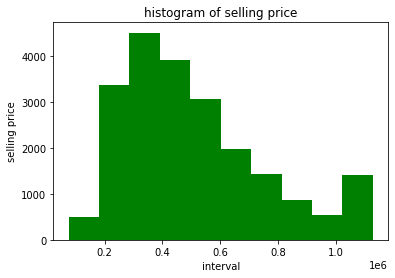

In [57]:

plt.hist(data['Sale Price'],bins=10,color='green')
plt.xlabel('interval')
plt.ylabel('selling price')
plt.title('histogram of selling price')
plt.show()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

### CHECKING MISSING VALUES IN INDEPENDENT VARIABLE

In [59]:
numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [60]:
from sklearn.impute import SimpleImputer as sp
imputer=sp(missing_values=np.nan,strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [61]:
data['Zipcode'].shape

(21609,)

In [62]:
column=data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [63]:
column=data['Zipcode'].values.reshape(-1,1)
imputer=sp(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(column)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [64]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [65]:
mapping={'None':'0',
         'Once':'1',
         'Twice':'2',
         'Four':'4',
         'Thrice':'3'}
data['No of Times Visited']=data['No of Times Visited'].map(mapping)
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [66]:
#creating a new variable named ever renovated
data['Ever Renovated']=np.where(data ['Renovated Year']==0,'No','Yes')

In [67]:
#creating a new variable called purchase year
data['Purchase Year']=pd.DatetimeIndex(data['Date House was Sold']).year

In [68]:
#creating a new variable called Year Since Renovation
data['Year Since Renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['Purchase Year']- data['Renovated Year']),0)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Year Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [69]:
data.drop(columns=['Purchase Year','Date House was Sold','Renovated Year'],inplace=True)
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [70]:
data['Sale Price'].corr(data['Flat Area (in Sqft)'])

0.6951704258420669

In [71]:
data.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.346928,0.148083,-0.409515,-0.326307,-0.071016,0.203375


In [72]:
data.drop(columns='ID',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [73]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

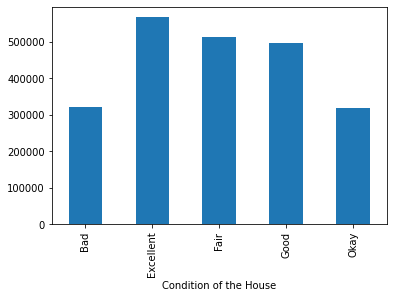

In [74]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind='bar')

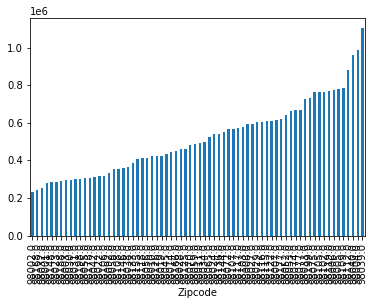

In [75]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

CREATION OF DUMMY VARIABLES

In [76]:
data.rename(columns={'Waterfront View':'Waterfront_View','Condition of the House':'Condition_of_the_House','Ever Renovated':'Ever_Renovated'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront_View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  object 
 8   Condition_of_the_House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [77]:
data=pd.get_dummies(data,columns=['Condition_of_the_House'],drop_first=True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [78]:
data=pd.get_dummies(data,columns=['Waterfront_View','Ever_Renovated'],drop_first=True)

In [79]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


BINNING

In [80]:
zip_table=data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=True)

In [81]:
zip_table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [82]:
#creating bins for zipcode
zip_table['Zipcode_group']=pd.cut(zip_table['Sale Price'],bins=10,
                labels=['Zipcode_group_0',
                        'Zipcode_group_1',
                        'Zipcode_group_2',
                        'Zipcode_group_3',
                        'Zipcode_group_4',
                        'Zipcode_group_5',
                        'Zipcode_group_6',
                        'Zipcode_group_7',
                       'Zipcode_group_8',
                        'Zipcode_group_9'],
                include_lowest=True)

In [83]:
zip_table.drop(columns=['Sale Price'])

,Zipcode_group
Zipcode,
98002.0,Zipcode_group_0
98168.0,Zipcode_group_0
98032.0,Zipcode_group_0
98001.0,Zipcode_group_0
98148.0,Zipcode_group_0
...,...
98109.0,Zipcode_group_6
98112.0,Zipcode_group_7
98040.0,Zipcode_group_8


In [84]:
#mergeing zip_table with original data
data=pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)

In [85]:
data=data.drop(columns='Zipcode')

In [86]:
data.head()

,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Sale Price_y,Zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,5650,0,0,1,0,0,0,0,308435.561069,Zipcode_group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,7639,26,0,1,0,0,0,1,462330.404878,Zipcode_group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,8062,0,0,1,0,0,0,0,460825.088339,Zipcode_group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,5000,0,1,0,0,0,0,0,540466.049430,Zipcode_group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,7503,0,0,1,0,0,0,0,666588.201814,Zipcode_group_4


In [87]:
data=pd.get_dummies(data,columns=['Zipcode_group'],drop_first=True)

In [88]:
data.head()

,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Sale Price_y,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,308435.561069,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,462330.404878,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,460825.088339,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,540466.049430,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,666588.201814,0,0,0,1,0,0,0,0,0


In [89]:
data.drop(columns=['Sale Price_y'],inplace=True)
data.head()

,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [90]:
data.rename(columns={'Sale Price_x':'Sale Price'},inplace=True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


IMPLEMENTING LINEAR REGRESSION

SCALEING THE DATASET

In [91]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
y=data['Sale Price']
x=scaler.fit_transform(data.drop(columns=['Sale Price']))
x=pd.DataFrame(data=x,columns=data.drop(columns=['Sale Price']).columns)
x.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


checking and removing multicollinearity

In [92]:
x.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.225182,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [93]:
#pair of independent variables with corelation greater than 0.5
k=x.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]) >abs(0.5) and (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

calculating VIF

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=x

##calculating vif for every column
vif=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns) 
vif

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Year Since Renovation                           2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [95]:
vif[vif==vif.max()].index[0]

'Flat Area (in Sqft)'

In [96]:
def mc_remover(data):
  vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
  if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'has been removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
  else:
    print("there is no multicollinearty anymore")
    return data

In [97]:
for i in range(7):
    vif_data=mc_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
there is no multicollinearty anymore
there is no multicollinearty anymore
there is no multicollinearty anymore
there is no multicollinearty anymore
there is no multicollinearty anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


training and testing dataset

In [98]:
x=vif_data
y=data['Sale Price']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((15126, 28), (6483, 28), (15126,), (6483,))

IMPLEMENTING OF LINEAR REGRESSION

In [100]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize = True)
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [101]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603571,
        -2296.64888137,  10761.77007875,  14594.33847962,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [102]:
predictions=lr.predict(x_test)
lr.score(x_test,y_test)

0.8461987715586199

VERIFYING THE ASSUMTIONS LINEAR REGRESSION

RESIDUALS

In [103]:
residuals=predictions-y_test

residual_table=pd.DataFrame({'residuals':residuals,'predictions':predictions}).sort_values(by='predictions')

In [104]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

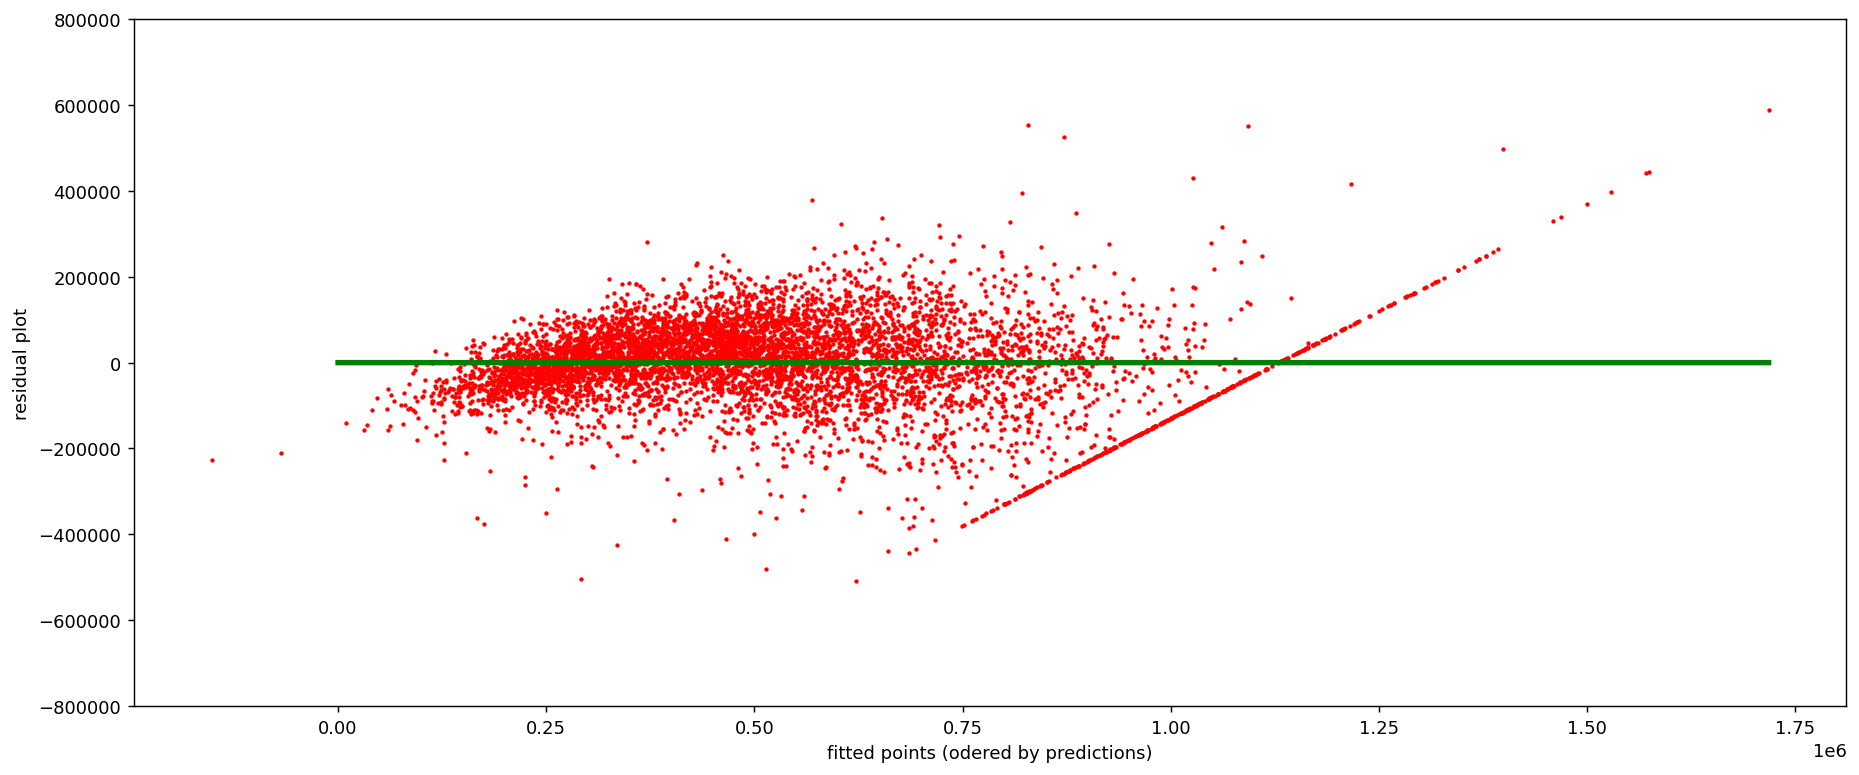

In [105]:
plt.figure(figsize=(17,7),dpi=130)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,linewidth=3,color='green',label='regression_line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points (odered by predictions)')
plt.ylabel('residual plot')
plt.show()

DISTRIBUTION OF ERRORS

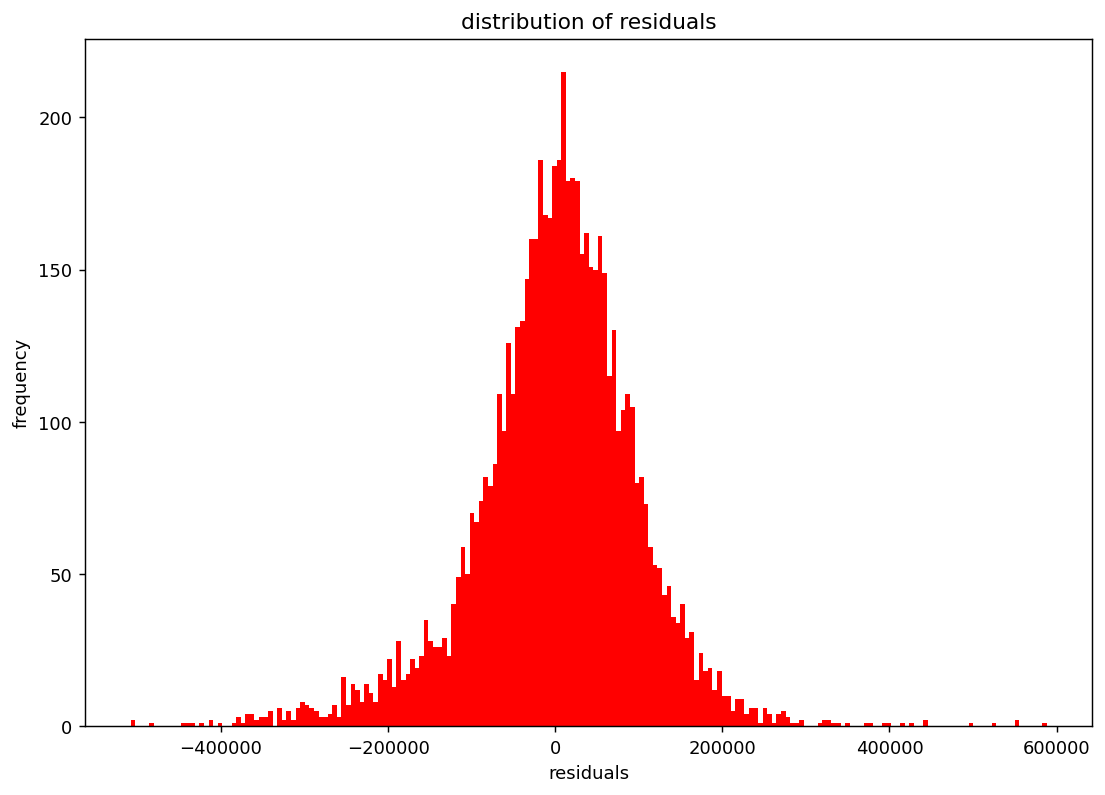

In [106]:
plt.figure(dpi=130,figsize=(10,7))
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

INTERPRETING THE THE RESULT OF OUR LINEAR REGRESSION MODEL

In [109]:
coeff_table=pd.DataFrame({'column':x_train.columns,'co_efficients':lr.coef_})
coeff_table=coeff_table.sort_values(by='co_efficients')

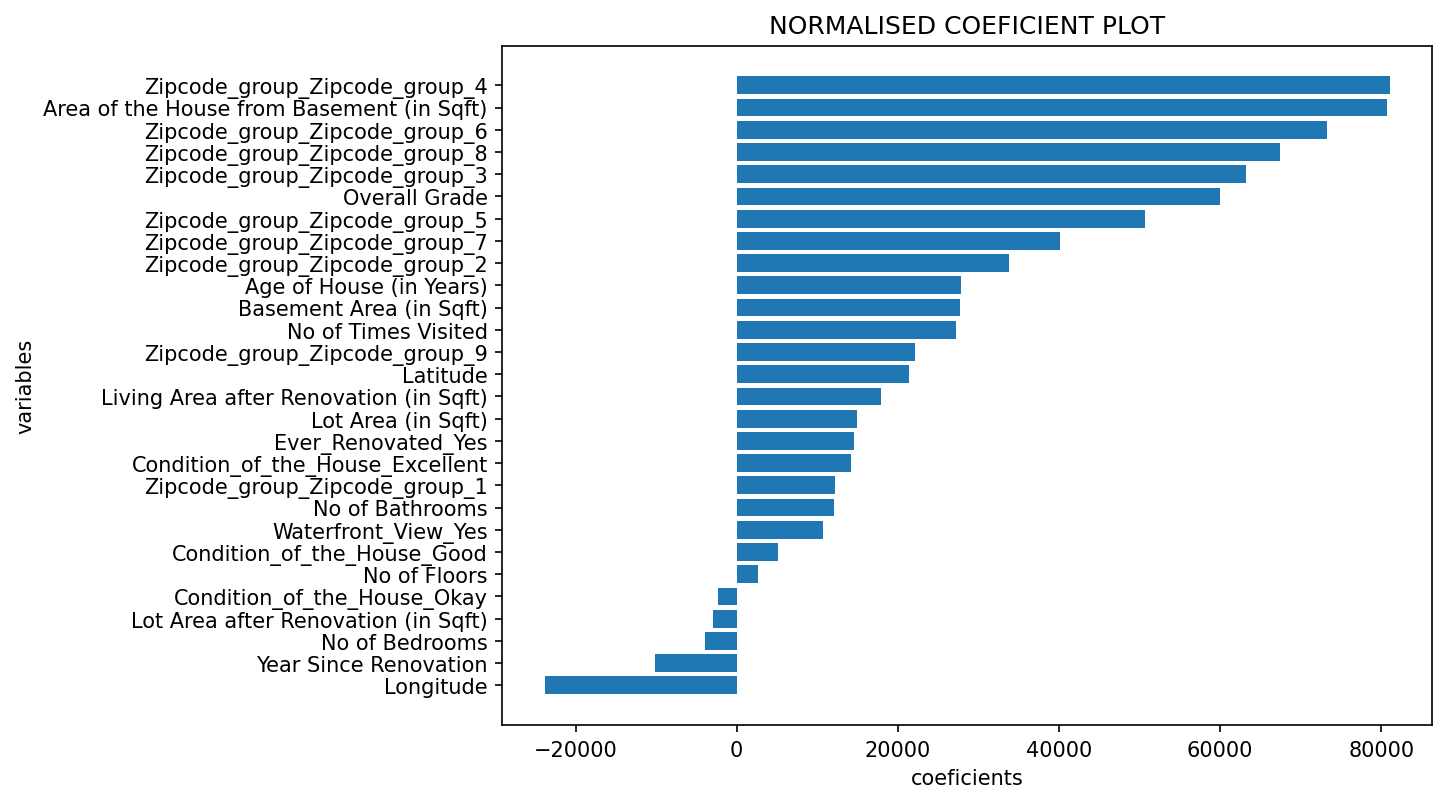

In [110]:
plt.figure(figsize=(8,6),dpi=150)
x=coeff_table['column']
y=coeff_table['co_efficients']
plt.barh(x,y)
plt.xlabel('coeficients')
plt.ylabel('variables')
plt.title('NORMALISED COEFICIENT PLOT')
plt.show()